In [14]:
import cv2   # lib para ler o arquivo da imagem em matriz
import numpy as np   # para trabalhar com a matriz da imagem 
from numpy import random # para gerar o ruido impulsivo
import matplotlib.pyplot as plt   # para plotar a imagem
import time
import os
np.seterr(all='ignore') #ignorar errinhos de ndarray (listas de numpy)





###///////////////////////////////////////////////////
''' criando funções importantes '''
def cinzando(img_):
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY) #deixando a imagem cinza (feia) para poder ser trabalhada melhor
  return img_
#para plotagem
def plt_169(img_,title):
    #plt.cla() #limpa os axels
    #plt.clf() #limpa o figure
    
    
    #ax, fig = plt.subplots(figsize=(16,9)) #criando novos axes e figures com tamanho de 16x9
    
    plt.imshow(img_,cmap='gray') #pega a imagem para plotagem
    plt.title(title,fontweight='bold') #dá o titulo ao plot
    plt.savefig(title.replace(' ','_')+'.png') #salva o plot com o nome do titulo
    plt.clf()
    plt.cla()
    #plt.close() #forçando a amizade para encerrar a brincadeira 




#criando função para o ruido impulsivo (sal e pimenta)
def adicionar_ruido(img_or_, modo='s&p',grau=.4):
    img_n =np.zeros(img_or_.shape) #criando uma nova img a partir da original
    linhas , colunas = img_n.shape #pegando o numero de linhas e colunas da imagem
    n_pixels = linhas*colunas
    if 's' in modo:
      pixels = random.randint(300, int(10000)) # número de pixels com sal
      for i in range(pixels):
          y_coord=random.randint(0, linhas - 1) #escolhendo de maneira aleatoria onde o ruido de sal vai cair nas linhas da imagem
          x_coord=random.randint(0, colunas - 1) #escolhendo de maneira aleatoria onde o ruido de sal vai cair nas colunas da imagem
          img_n[y_coord][x_coord] = np.random.randint(90,255) #adicinando o sal
          
    if 'p' in modo:
      pixels = random.randint(300,int(10000)) # número de pixels com pimenta
      for i in range(pixels):
          y_coord=random.randint(0, linhas - 1) #escolhendo de maneira aleatoria onde o ruido de pimenta vai cair nas linhas da imagem
          x_coord=random.randint(0, colunas - 1) ##escolhendo de maneira aleatoria onde o ruido de pimenta vai cair nas colunas da imagem
          img_n[y_coord][x_coord] = np.random.randint(0,10) #adicinando a pimenta 
           
    return cv2.add(img_or_,img_n.astype(np.uint8)) #retornando a matrix da imagem já ruidosa como uint8 para não dá erro na sua acoplagem ou subtração com a original











'''AQUI QUE A FESTA COMEÇA '''

#mediana caseira (feita por nós)
def media2D(arr):
    lista_n = [] #criando uma nova lista para que nela seja ordenada o pixel 3x3 e assim seja pega a sua mediana
    for l in arr:
        for p in l:
            lista_n.append(p)
    lista_n.sort()
    
    #agora ordenado em uma lista de 1D, vamos pegar a danadinha da mediana
    
    #simples, nem deveria comentar aqui
    # caso o numero de termos for par, ele vai pegar os dois termos que estão no meio 
    return int(sum(lista_n)/len(lista_n))


#desvio padrao
#foi uma tentativa de automatizar o T 
#o T, é o limite que o filtro de mediana, vai poder trabalhar com os pixels ao seu redor
#ao meu ver, o desvio padrão da matriz de pixel 3x3, poderia dá uma certa dkmenção de um T mais adequado
#mas foi deixado de lado nos testes
def desv_pixel(arr):
    arr = list(arr)
    lista_n = []
    for l in arr:
        for p in l:
            lista_n.append(p)
    lista_n.sort()
    desv = stt.stdev(lista_n)*10
    return desv




#testes com a nossa mediana 





'''AQUI O DEMO, O CAPIROTO, O FILTRO DE PIXEL UNICO 3X3'''
def media2D_filtro(arr,modo='med',T=10):
    nova_arr = arr #criando um novo pixel apartir do original
#    desv = desv_pixel(arr)
    media_ = media2D(arr) #pegando a mediana do pixel 
    c = 0 #criando a interação da coluna que ele vai percorrer 
    l = 0 #criando a interação da linha que ele vai andar

    for lin in arr: #andando as linhas das colunas 
        for p in lin: #andando no número das linhas 
           # print(f'o q eh:{p} | oq tô pegando {arr[c][l]}')
           
            #lembrando, que o T é o filtro mestre deste filtro mediano
            #usar a condição de p>mediana para mudar, não vai tirar a pimenta do pixel 3x3, pois ela é muito pequena
            # mas com tudo, deixei ao critério em qual vcs vão querer usar

            # modo = "max" vai pegar os p que forem maior que a mediana ser igual a mediana
            # modo = "T" vai pegar os p que tiver a uma distância maior T da mediana, e igualar a ela

            if modo=='T':
              #print(f"vc escolheu o T={T}")
              if abs(p-media_)>T:
                  p = media_ # se a diferença do pixel para a mediana, for maior do que é aceita pelo parâmetro T, este pixel é trocado pela mediana 
                  nova_arr[c][l] = p #e ele é adicionado de volta ao conjunto de pixels 3x3
              else:
                  nova_arr[c][l] = p # eu N vi nada 

            elif modo=='med':
              #print('vc escolheu maxMed')
              if p>media_:
                  p = media_ # se o pixel em questão for maior do que a mediana, o danadinho será imediatamente substituído pela mediana 
                  nova_arr[c][l] = p #e ele é adicionado de volta ao conjunto de pixels 3x3
              else:
                  nova_arr[c][l] = p # eu N vi nada 

            l = l+1 # fazer o código andar nas linhas 
        c = c+1 # fazer o código percorrer as colunas 
        l = 0 #toda vez que o código terminar uma linha, em uma coluna, ele deve recomeçar sempre do zero, pq se não vai tentar andar em casas que não existem
    return np.array(nova_arr)






'''SE ALI ATRÁS ERA O CAPIROTO, ISSO AQUI É O BELZUBU'''
'''Eh A CARROÇA DO CAPIROTO'''
'''Eh ISSO AQUI QUE VAI ORGANIZAR A IMAGEM EM PIXELS 3X3, E FAZER O CAPIROTINHO QUE FIZEMOS, ANDAR EM TODOS ESSES PIXELS, FILTRANDO ELES'''

#função para retirar o ruído (pela mediana de cada pixel de matriz)
def retirar_ruido(img_ori,modo="med",T=5,prt=True):
    rest_pixel = img_ori[0:(img_ori.shape[0]-(img_ori.shape[0]%9))] # tirando o excesso da imagem que não poderar ser organizada em pixels 3x3
    img_3D_ = img_ori.reshape((img_ori.shape[0]*img_ori.shape[1])//9,3,3) # reorganizando a imagem cinza, em pixels 3x3
    nova_img = np.zeros(img_3D_.shape) #np.zeros(img_3D.shape)
    i = 0 # interação para contagem de índices 
    c = 0 # interação para percorrer as colunas
    l = 0 # interação para andar as linhas 
    
    #visitando os pixels 3x3 e filtrando eles com a mediana
    size = len(img_3D_) # pegando o número de pixels 3x3
    for pixel in img_3D_:
      
        #print simples para mostrar a nossa taxa de produção
        if prt==True:
          print(f'indice: {i}/{size} ({(i*100/size):.2f}%)')
        #print(pixel)
        # criando novo pixel filtrado
        # um novo homem, que aceitou as boas novas da mediana, (sobre o regime do filtro T)
        novo_pixel = media2D_filtro(pixel,modo=modo,T=T)
        #print(novo_pixel)
        # devolvendo o colega para a casa dele
        nova_img[c] = novo_pixel
        
        c = c+1 # interação para fazer o código sair do lugar
        i+=1 # interação para fazer o índice de produção saber em qual percudo estamos 
        
    print('então...') # tentei fazer uma piadoca, mas não consegui ;-;
    nova_im = nova_img.reshape(*img_ori.shape) # reorganizando a imagem do jeito que a pegamos 
    # muito foda, né?
    
    print('foi... sheipado') # melhor do que academia :)
    return nova_im







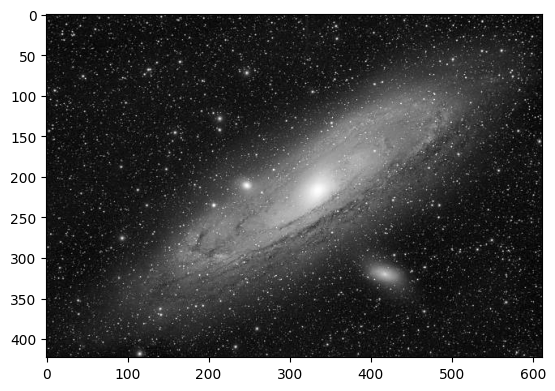

In [15]:
img = cv2.imread('test.png')
img_g = cinzando(img)

plt.imshow(img_g,cmap='gray')

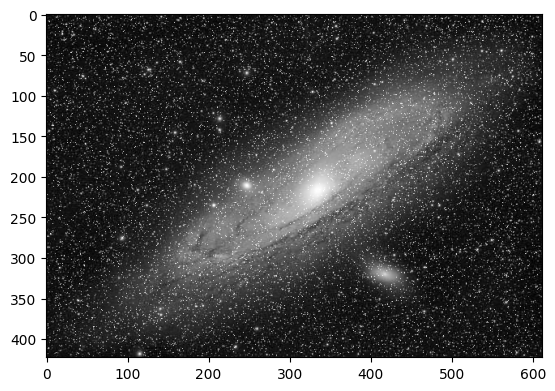

In [16]:
img_r = adicionar_ruido(img_g)
plt.imshow(img_r,cmap='gray')

In [ ]:
img_d = retirar_ruido(img_r,prt=False)